Loading simulated DRO from: /ess/scratch/scratch1/rachelgordon/simulated_dataset/sample_001_sub1/dro_ground_truth.npy
Loading tumor mask from: /gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data/sub1.mat

Calculating mean signal intensity in tumor ROI for each frame...
Calculation complete.


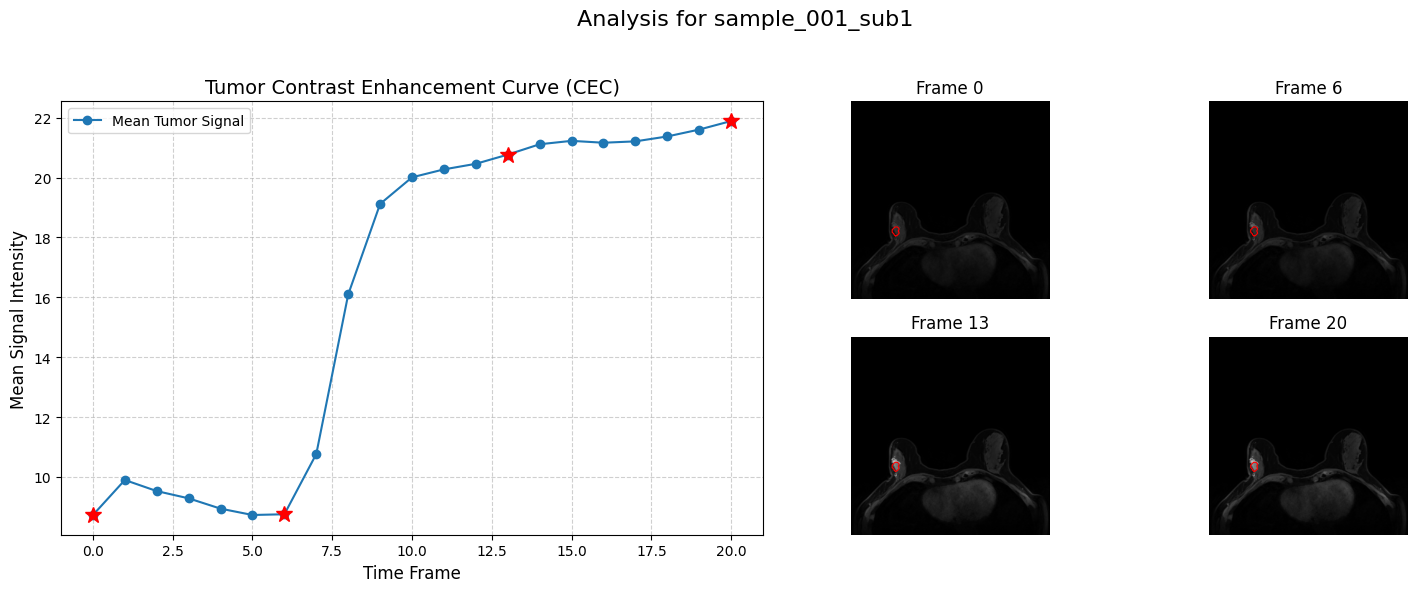

Unique values in the mask are: [0 1 3 4 5 7 8]


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# ===================================================================
# --- 1. CONFIGURATION: SET YOUR PATHS HERE ---
# ===================================================================

# Set the directory where the original '.mat' files are.
ORIGINAL_DATA_DIRECTORY = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data'

# Set the main directory where all your 'sample_XXX_sub_Y' folders are.
SIMULATED_DATA_DIRECTORY = '/ess/scratch/scratch1/rachelgordon/simulated_dataset/'

# --- Set which sample you want to load ---
SAMPLE_NUMBER = 1
PATIENT_ID = 'sub1' # Use the format with the underscore

# ===================================================================
# --- 2. BUILD FILE PATHS AND LOAD DATA ---
# ===================================================================

# Path to the simulated data
sample_dir = os.path.join(SIMULATED_DATA_DIRECTORY, f"sample_{SAMPLE_NUMBER:03d}_{PATIENT_ID}")
dro_path = os.path.join(sample_dir, 'dro_ground_truth.npy')

# Path to the original .mat file to get the mask
mat_filename = f"{PATIENT_ID.replace('_', '')}.mat" # e.g., 'sub_1' -> 'sub1.mat'
mask_path = os.path.join(ORIGINAL_DATA_DIRECTORY, mat_filename)

print(f"Loading simulated DRO from: {dro_path}")
print(f"Loading tumor mask from: {mask_path}")

try:
    # Load the simulated DRO image stack
    dro_image_stack = np.load(dro_path)
    
    # Load the original .mat file to get the mask
    mat_contents = loadmat(mask_path)
    mask = mat_contents['mask']
    
except FileNotFoundError as e:
    print(f"Fatal Error: Could not load required file.")
    print(e)
    raise

# ===================================================================
# --- 3. CALCULATE THE TUMOR ENHANCEMENT CURVE ---
# ===================================================================

# Create a boolean mask for the tumor region (where mask value is 1)
tumor_mask = (mask == 3)
num_frames = dro_image_stack.shape[2]
time_points = np.arange(num_frames)
tumor_intensities = []

print("\nCalculating mean signal intensity in tumor ROI for each frame...")
for t in range(num_frames):
    # Get the magnitude of the current frame
    frame_magnitude = np.abs(dro_image_stack[:, :, t])
    
    # Use the boolean mask to select only the pixels within the tumor
    pixels_in_tumor = frame_magnitude[tumor_mask]
    
    # Calculate the average intensity of these pixels and store it
    mean_intensity = np.mean(pixels_in_tumor)
    tumor_intensities.append(mean_intensity)

print("Calculation complete.")

# ===================================================================
# --- 4. VISUALIZE THE RESULTS ---
# ===================================================================

# Create a figure with a more complex layout
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(2, 4) # 2 rows, 4 columns grid

# --- Main plot for the enhancement curve (takes up the left half) ---
ax_curve = fig.add_subplot(gs[:, :2])
ax_curve.plot(time_points, tumor_intensities, 'o-', label='Mean Tumor Signal')
ax_curve.set_title('Tumor Contrast Enhancement Curve (CEC)', fontsize=14)
ax_curve.set_xlabel('Time Frame', fontsize=12)
ax_curve.set_ylabel('Mean Signal Intensity', fontsize=12)
ax_curve.grid(True, linestyle='--', alpha=0.6)
ax_curve.legend()

# --- Smaller plots for specific image frames (on the right half) ---
# Select a few key frames to display
frames_to_show = np.linspace(0, num_frames - 1, 4, dtype=int)
axes_img = [fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[0, 3]),
            fig.add_subplot(gs[1, 2]), fig.add_subplot(gs[1, 3])]

# Find the overall max value for consistent color scaling
vmax = np.abs(dro_image_stack).max()

for i, frame_idx in enumerate(frames_to_show):
    ax = axes_img[i]
    
    # Display the image frame
    ax.imshow(np.abs(dro_image_stack[:, :, frame_idx]), cmap='gray', vmin=0, vmax=vmax)
    
    # Overlay the tumor mask as a red contour
    ax.contour(tumor_mask, colors='red', linewidths=0.8, levels=[0.5])
    
    ax.set_title(f'Frame {frame_idx}')
    ax.axis('off')
    
    # Add a marker on the main curve to show which point this image corresponds to
    ax_curve.plot(time_points[frame_idx], tumor_intensities[frame_idx], 'r*', markersize=12)

fig.suptitle(f"Analysis for {os.path.basename(sample_dir)}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(f"Unique values in the mask are: {np.unique(mask)}")

In [6]:
import scipy.io

# Use the same path as in your script
mask_path = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data/sub1.mat'

# Load the .mat file
mat_contents = scipy.io.loadmat(mask_path)

# Print all the variable names stored inside the file
print("Variables found in the .mat file:")
print(mat_contents.keys())

# If there are other masks, you could check their shapes
# For example, if you find a 'lesion_mask'
# if 'lesion_mask' in mat_contents:
#     print("\nShape of 'lesion_mask':", mat_contents['lesion_mask'].shape)

Variables found in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'S0', 'aif', 'mask', 'smap'])


Loading mask from: /gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data/sub1.mat
Mask loaded successfully.
Shape of the mask is: (320, 320)
Unique values in the mask are: [0 1 3 4 5 7 8]


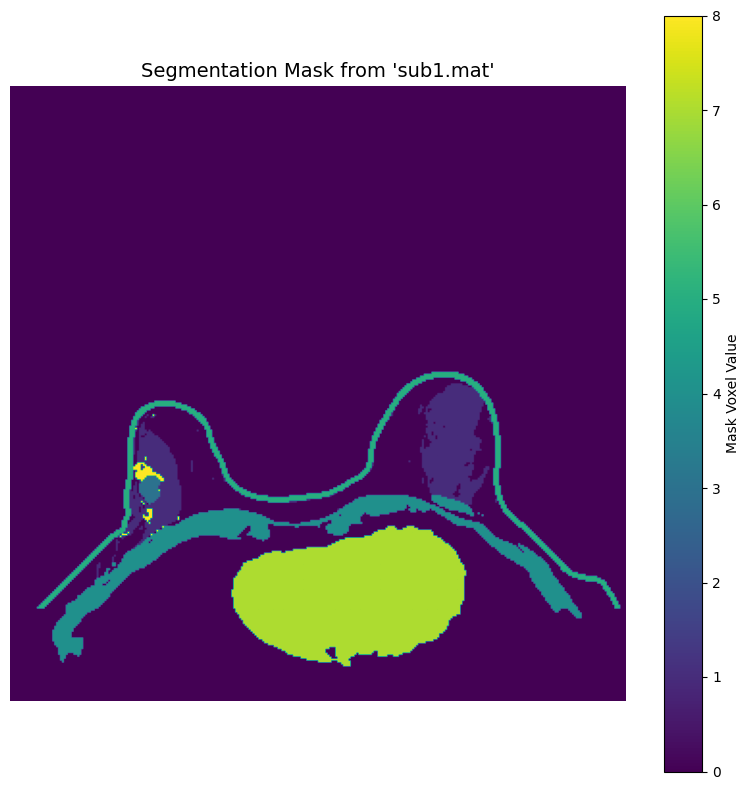

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# ===================================================================
# --- 1. CONFIGURATION: SET YOUR PATHS AND FILENAME HERE ---
# ===================================================================

# Set the directory where the original '.mat' files are.
# This should be the path to the 'data' folder from the DRO-BreastDCEMRI repository.
REAL_DATA_DIRECTORY = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data'

# Set the filename of the specific subject you want to visualize.
MAT_FILENAME = 'sub1.mat'

# The variable name of the mask inside the .mat file.
# This is likely 'mask', but could be different in other files.
MASK_VARIABLE_NAME = 'mask'

# ===================================================================
# --- 2. LOAD THE MASK DATA ---
# ===================================================================

# Build the full path to the file
full_path = os.path.join(REAL_DATA_DIRECTORY, MAT_FILENAME)

print(f"Loading mask from: {full_path}")

try:
    # Load the .mat file
    mat_contents = loadmat(full_path)
    
    # Extract the mask array using the specified variable name
    mask = mat_contents[MASK_VARIABLE_NAME]
    
except FileNotFoundError:
    print(f"--- FATAL ERROR ---")
    print(f"File not found at: {full_path}")
    print(f"Please make sure REAL_DATA_DIRECTORY and MAT_FILENAME are correct.")
    raise

except KeyError:
    print(f"--- FATAL ERROR ---")
    print(f"Variable '{MASK_VARIABLE_NAME}' was not found in '{MAT_FILENAME}'.")
    print(f"Available variables are: {list(mat_contents.keys())}")
    print(f"Please update the MASK_VARIABLE_NAME variable.")
    raise

print("Mask loaded successfully.")
print(f"Shape of the mask is: {mask.shape}")
print(f"Unique values in the mask are: {np.unique(mask)}")

# ===================================================================
# --- 3. PLOT THE MASK ---
# ===================================================================

plt.figure(figsize=(8, 8))

# Use imshow to display the 2D mask array as an image.
# 'viridis' or 'magma' are good colormaps for showing different integer levels.
plt.imshow(mask, cmap='viridis')

# Add a color bar to show what numerical value each color corresponds to.
# This is crucial for understanding what's in the mask.
plt.colorbar(label='Mask Voxel Value')

# Add a title and turn off the pixel coordinate axes for a cleaner look.
plt.title(f"Segmentation Mask from '{MAT_FILENAME}'", fontsize=14)
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

Loading data from: /gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data/sub1.mat
Data loaded successfully.
Image shape: (320, 320)
Mask shape: (320, 320)
Unique mask values: [0 1 3 4 5 7 8]


/tmp/ipykernel_2561576/44827938.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap('viridis', len(unique_labels))


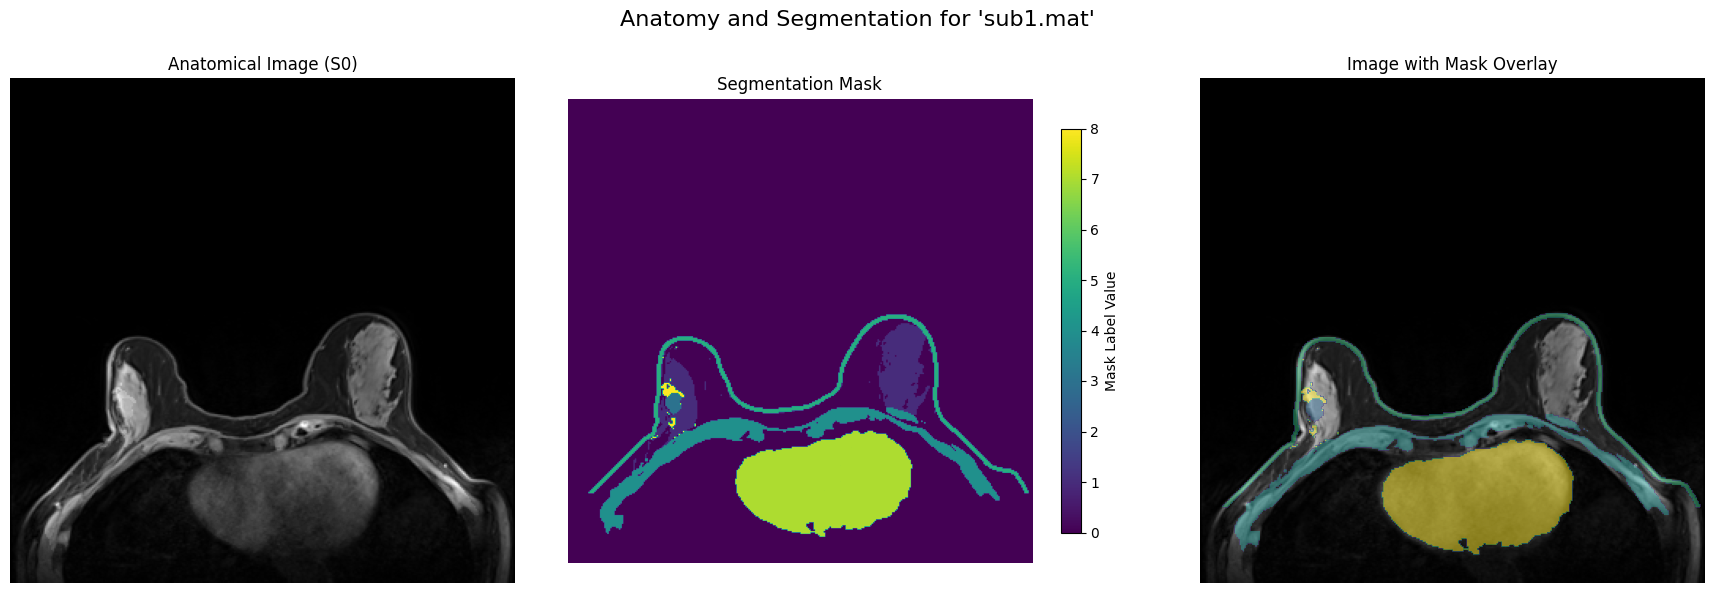

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap, BoundaryNorm

# ===================================================================
# --- 1. CONFIGURATION ---
# ===================================================================
# Set the directory where the original '.mat' files are.
REAL_DATA_DIRECTORY = '/gpfs/data/karczmar-lab/workspaces/rachelgordon/DRO-BreastDCEMRI/data'

# Set the filename of the specific subject you want to visualize.
MAT_FILENAME = 'sub1.mat'

# Variable names inside the .mat file.
MASK_VARIABLE_NAME = 'mask'
IMAGE_VARIABLE_NAME = 'S0' # S0 is the baseline anatomical image

# ===================================================================
# --- 2. LOAD THE DATA ---
# ===================================================================
full_path = os.path.join(REAL_DATA_DIRECTORY, MAT_FILENAME)
print(f"Loading data from: {full_path}")

try:
    mat_contents = loadmat(full_path)
    mask = mat_contents[MASK_VARIABLE_NAME]
    image = mat_contents[IMAGE_VARIABLE_NAME]
except FileNotFoundError:
    print(f"--- FATAL ERROR: File not found at: {full_path}")
    raise
except KeyError as e:
    print(f"--- FATAL ERROR: Variable {e} not found in '{MAT_FILENAME}'.")
    print(f"Available variables are: {list(mat_contents.keys())}")
    raise

print("Data loaded successfully.")
print(f"Image shape: {image.shape}")
print(f"Mask shape: {mask.shape}")

unique_labels = np.unique(mask)
print(f"Unique mask values: {unique_labels}")

# ===================================================================
# --- 3. PLOT SIDE-BY-SIDE ---
# ===================================================================

# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Anatomy and Segmentation for '{MAT_FILENAME}'", fontsize=16)

# --- Panel 1: The Anatomical S0 Image ---
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Anatomical Image (S0)')
axes[0].axis('off')

# --- Panel 2: The Segmentation Mask ---
# Use a specific colormap like 'viridis' or 'tab10' for clarity
# The colorbar will show which integer value corresponds to which color
mask_plot = axes[1].imshow(mask, cmap='viridis')
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

# Add a colorbar specifically for the mask plot
cbar = fig.colorbar(mask_plot, ax=axes[1], shrink=0.8)
cbar.set_label('Mask Label Value')

# --- Panel 3: Image with Mask Overlay ---
# This is the most informative plot
axes[2].imshow(image, cmap='gray') # Show the anatomy in grayscale
axes[2].set_title('Image with Mask Overlay')
axes[2].axis('off')

# Create a custom colormap for the overlay. We want the background (value 0)
# to be completely transparent.
# Get the 'viridis' colormap
viridis = plt.cm.get_cmap('viridis', len(unique_labels))
new_colors = viridis(np.linspace(0, 1, len(unique_labels)))
# Set the alpha (transparency) of the first color (for label 0) to 0
new_colors[0, -1] = 0
# Create a new colormap from the modified colors
transparent_cmap = ListedColormap(new_colors)

# Overlay the mask using the new transparent colormap
# The `alpha` parameter makes the whole overlay semi-transparent
overlay = axes[2].imshow(mask, cmap=transparent_cmap, alpha=0.5)

# --- Finalize and Show Plot ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()